<a href="https://colab.research.google.com/github/legendarychristian/GOOGL-Linear-Regression-Analysis/blob/main/GOOGL_Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install yfinance
!pip install mplfinance

In [35]:
import plotly.graph_objects as go         # To plot the candlestick
import pandas as pd                       # structures and data analysis
import datetime as dt                     #
import yfinance as yf                     # Yahoo! Finance market data downloader
import seaborn as sns
import mplfinance as mpf
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


# Downloading & Processing Data


In [29]:
# we are going to get the META data from the last 300 days

# lets get the timefram first -> getting today's date and the date that corresponds to 300 days prior
actual_date = dt.date.today()
print(actual_date)
beginning_date = actual_date - dt.timedelta(days=300) #we use .timedelta for math involving a specific timeframe
print(beginning_date)

# now we are going to format our dates
actual_date = actual_date.strftime("%Y-%m-%d")
beginning_date = beginning_date.strftime("%Y-%m-%d")
print(actual_date, beginning_date)

# now lets get META's stock information for the past 300 days
stock = 'GOOGL'
data = yf.download(stock, beginning_date, actual_date)
df = pd.DataFrame(data=data)
df.tail()

[*********************100%%**********************]  1 of 1 completed

2024-01-28
2023-04-03
2024-01-28 2023-04-03


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-22,147.100006,148.389999,145.839996,145.990005,145.990005,32200400
2024-01-23,145.889999,147.179993,145.500000,147.039993,147.039993,21636100
2024-01-24,148.539993,149.850006,148.100006,148.699997,148.699997,25233500
2024-01-25,150.070007,153.050003,149.539993,151.869995,151.869995,29149100
2024-01-26,151.100006,152.539993,151.009995,152.190002,152.190002,26101000


# Plotting A Candlestick Graph Of The Stock Price From 1/22 - 1/23

[*********************100%%**********************]  1 of 1 completed



                                 Open        High         Low       Close  \
Datetime                                                                    
2024-01-22 09:30:00-05:00  147.100006  148.389999  147.100006  148.169998   
2024-01-22 09:35:00-05:00  148.179993  148.339996  147.610001  147.720001   
2024-01-22 09:40:00-05:00  147.710007  147.729996  147.419998  147.495300   
2024-01-22 09:45:00-05:00  147.479996  147.990005  147.440002  147.854996   
2024-01-22 09:50:00-05:00  147.854996  148.330002  147.830002  148.324997   

                            Adj Close   Volume  
Datetime                                        
2024-01-22 09:30:00-05:00  148.169998  3173036  
2024-01-22 09:35:00-05:00  147.720001   720076  
2024-01-22 09:40:00-05:00  147.495300   635002  
2024-01-22 09:45:00-05:00  147.854996   500065  
2024-01-22 09:50:00-05:00  148.324997   478240  


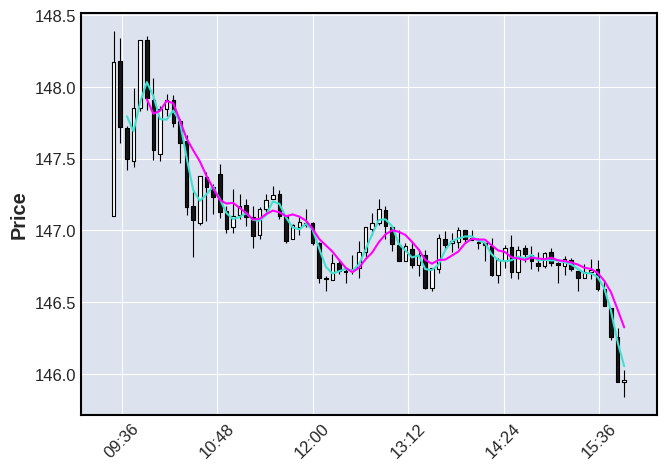

In [41]:
# now we are going to plot with candlesticks because thats what stock people do
# this is going to be in the interval of 5 minutes
# we are just looking at how to stock progresses over a day just to get a feel of the data
data = yf.download(tickers = stock, start = dt.datetime(2024, 1, 22), end = dt.datetime(2024, 1, 23), interval="5m")
data = pd.DataFrame(data=data)
print()
print(data.head())
mpf.plot(data, type = 'candle', mav = (3,6), volume = False, show_nontrading = True) #note to self: need to figure out what that MAV parameter is

# Creating Extra Features I Feel Are Necessary

In [30]:
# creating features:

def create_features(df):
  df['Day'] = df.index.day_of_week + 1
  df['Month'] = df.index.month
  return df

df = create_features(df)

In [31]:
# select our features and target

print(df.columns)

features = ['High', 'Low', 'Open', 'Volume', 'Day', 'Month']
target = ['Close']

print()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day', 'Month'], dtype='object')



# Splitting The Data Into Training & Testing Sets

In [32]:
# splitting into training and testing data
# also data processing - standardizing the data

train = df.loc[df.index < '01-01-2024']
test = df.loc[df.index >= '01-01-2024']

x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]


# Training My Model & Making Predictions

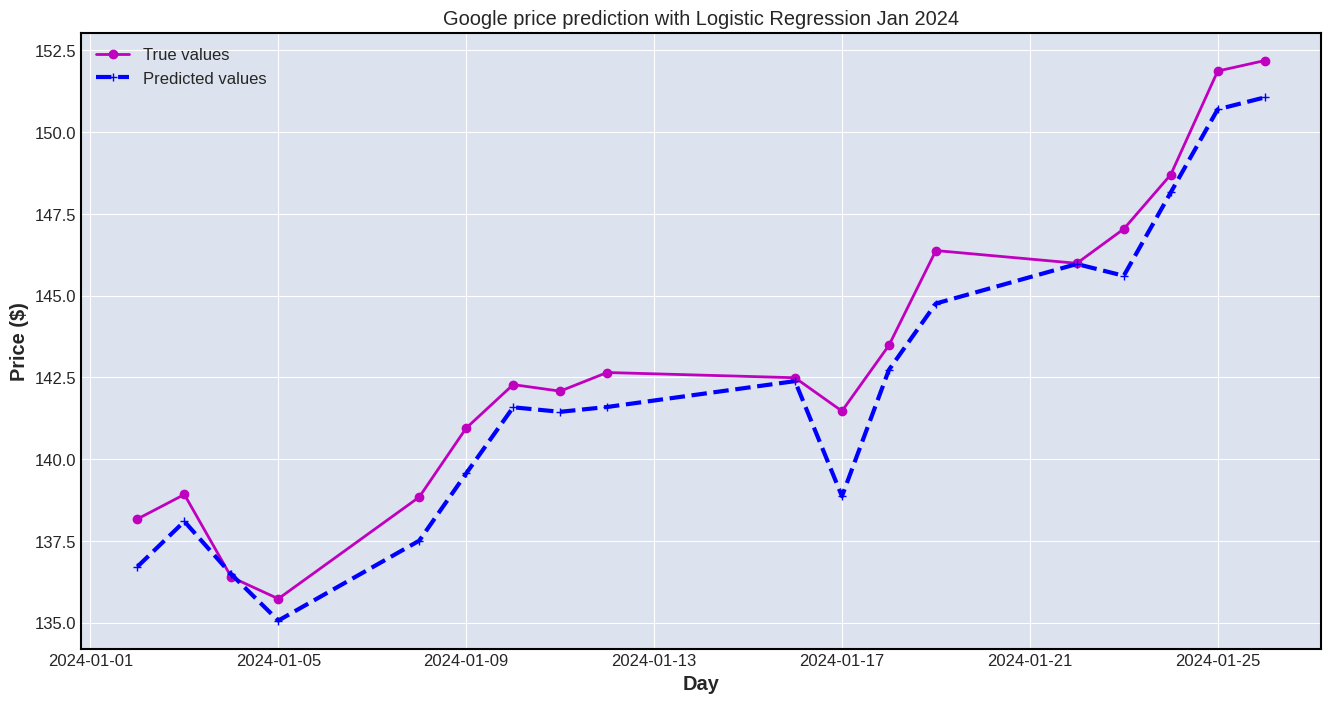

In [40]:
model_fitted = LinearRegression().fit(x_train,y_train)
y_predict = model_fitted.predict(x_test)

fig, ax = plt.subplots(figsize=(16,8))
#Draw with a red solid line.

ax.plot(x_test.index,
        y_test, 'm-o',
        lw=2,
        label=u'True values')

ax.plot(x_test.index,
        y_predict,
        'b--+',
        lw = 3,
        label=u'Predicted values')

#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.xlabel('Day')
plt.ylabel('Price ($)')
plt.title('Google price prediction with Logistic Regression Jan 2024')
plt.show()
